In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X_raw = iris.data
y = iris.target

In [2]:
import numpy as np
import pandas as pd
pd.DataFrame(X_raw,columns=iris.feature_names).assign(flower = y).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw,y,test_size = 0.3,random_state=617)

In [4]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train_raw)
X_train = scale.transform(X_train_raw)
X_test = scale.transform(X_test_raw)

In [5]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C = 1,random_state=617) 
#svm = SVC(kernel = 'linear', C = 1,random_state=617) 
svm.fit(X_train,y_train)

LinearSVC(C=1, random_state=617)

In [6]:
pred_train = svm.predict(X_train)
pred_test =  svm.predict(X_test)
pred_train

array([1, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 2,
       2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0])

In [7]:
svm.predict(X_train)[0:6]

array([1, 1, 1, 0, 1, 2])

In [8]:
svm.predict(X_train)[0:6]

array([1, 1, 1, 0, 1, 2])

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_train)
accuracy_score(y_test, pred_test)

0.9111111111111111

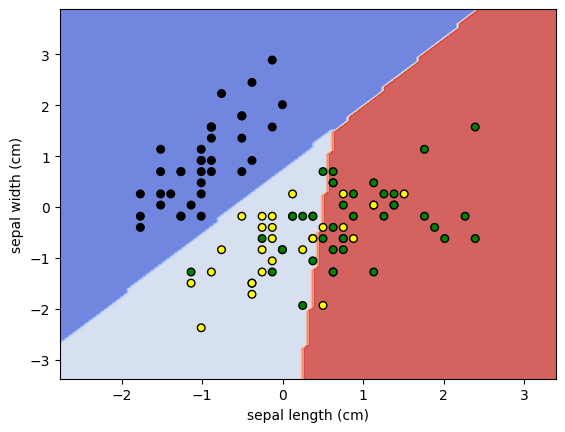

In [10]:
iris = load_iris()
X_raw = iris.data[:,:2]
y = iris.target
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw,y,test_size = 0.3,random_state=617)

scale = StandardScaler()
scale.fit(X_train_raw)
X_train = scale.transform(X_train_raw)
X_test = scale.transform(X_test_raw)

from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1,random_state=617) 
#svm = LinearSVC(C = 1,random_state=617) 
svm.fit(X_train,y_train)


from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
DecisionBoundaryDisplay.from_estimator(svm,
                                       X_train,
                                       response_method="predict",
                                       cmap=plt.cm.coolwarm,
                                       alpha=0.8,
                                       xlabel=iris.feature_names[0],
                                       ylabel=iris.feature_names[1])
plt.scatter(X_train[:, 0], 
            X_train[:, 1], 
            c = y_train, 
#            cmap=plt.cm.coolwarm, 
            cmap = ListedColormap(['black', 'yellow','green']),
            s=30, 
            edgecolors="k")
plt.show()

In [11]:
svm.support_

array([ 17,  29,  32,  38,  50,   0,   1,   4,   9,  13,  15,  16,  19,
        26,  30,  41,  44,  52,  54,  58,  67,  69,  70,  72,  73,  80,
        83,  84,  86,  89,  93,  97,  99,   2,   7,   8,  10,  14,  24,
        25,  31,  37,  39,  42,  43,  47,  49,  51,  56,  64,  71,  74,
        75,  76,  87,  90,  94, 100])

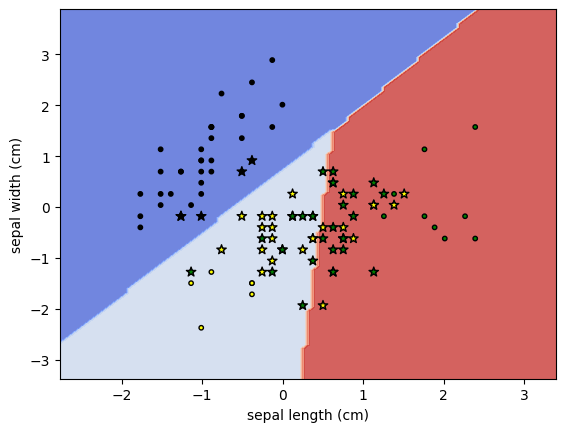

In [12]:
DecisionBoundaryDisplay.from_estimator(svm,
                                       X_train,
                                       response_method="predict",
                                       cmap=plt.cm.coolwarm,
                                       alpha=0.8,
                                       xlabel=iris.feature_names[0],
                                       ylabel=iris.feature_names[1])
plt.scatter(X_train[:, 0], 
            X_train[:, 1], 
            c = y_train, 
#            cmap=plt.cm.coolwarm, 
            cmap = ListedColormap(['black', 'yellow','green']),
            s=10, 
            edgecolors="k")
plt.scatter(X_train[svm.support_, 0], 
            X_train[svm.support_, 1], 
            c = y_train[svm.support_], 
#            cmap=plt.cm.coolwarm, 
            cmap = ListedColormap(['black', 'yellow','green']),
            s=50, 
            marker = '*',
            edgecolors="k")
plt.show()